<a href="https://colab.research.google.com/github/EduardoPrieto/BERT-Application/blob/master/compu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url = 'https://www.computrabajo.com.co/empresas/evaluaciones-en-productos-la-victoria-98578DF477E2F4E0'
url = 'https://www.computrabajo.com.co/empresas/evaluaciones-en-coorserpark-sas-67E586684928CF8C'

In [ ]:

def scrap(url):
  lista = []
  comments = []
  evaluacion = {}
  
  # Hace la solicitud a la url
  compu = requests.get(url)
  s = BeautifulSoup(compu.text, 'lxml')
  # Guarda la sección de evaluaciones
  secciones = s.find('ul', attrs={'class':'p0 m0'}).find_all('li', attrs={'class':'fl w_100 pb20 mb30 pb15_r mb15_r '})
  #puesto
  lista_evaluaciones = []
  for seccion in secciones:
    evaluacion = {}
    evaluacion['puesto'] = (seccion.find('p', attrs={'class':'fs18 fw_b f_i tablec_i w_66 pr10 pl40'}).text).strip()
    mini_seccion = seccion.find('p', attrs={'class':'fc80 fl w_100 fs13 mt5'}).text
    x = mini_seccion.split('·')
    evaluacion['estado'] = x[0].strip()
    evaluacion['ubicacion'] = x[1].strip()
    evaluacion['fecha'] = x[2].strip()
    evaluacion['comentario'] = seccion.find('p', attrs={'class':'fl w_100 comentario bWord'}).text
    lista_aspectos = seccion.find_all('span', attrs={'class':'fl100'})
    aspectos = [item.text for item in lista_aspectos]
    if(len(aspectos) == 0):
      evaluacion['bueno'] = 'Vacio'
      evaluacion['mejorar'] = 'nada'
    elif(len(aspectos) == 2):
      if(aspectos[0] == 'Lo mejor'):
        evaluacion['bueno'] = aspectos[1]
        evaluacion['mejorar'] = 'nada'
      else:
        evaluacion['bueno'] = aspectos[1]
        evaluacion['mejorar'] = 'nada'
    else:
      evaluacion['bueno'] = aspectos[1]
      evaluacion['mejorar'] = aspectos[3]
    lista.append(evaluacion)
  #print(lista_evaluaciones)

  comments.extend([seccion.find('p', attrs={'class':'fl w_100 comentario bWord'}).text for seccion in secciones])
  next = s.find('a', attrs={'rel':'next'})
  while(next):
    url = next.get('href')
    compu = requests.get(url)
    s = BeautifulSoup(compu.text, 'lxml')
    secciones = s.find('ul', attrs={'class':'p0 m0'}).find_all('li', attrs={'class':'fl w_100 pb20 mb30 pb15_r mb15_r '})
    for seccion in secciones:
      evaluacion = {}
      evaluacion['puesto'] = (seccion.find('p', attrs={'class':'fs18 fw_b f_i tablec_i w_66 pr10 pl40'}).text).strip()
      mini_seccion = seccion.find('p', attrs={'class':'fc80 fl w_100 fs13 mt5'}).text
      x = mini_seccion.split('·')
      evaluacion['estado'] = x[0].strip()
      evaluacion['ubicacion'] = x[1].strip()
      evaluacion['fecha'] = x[2].strip()
      evaluacion['comentario'] = seccion.find('p', attrs={'class':'fl w_100 comentario bWord'}).text
      lista_aspectos = seccion.find_all('span', attrs={'class':'fl100'})
      aspectos = [item.text for item in lista_aspectos]
      if(len(aspectos) == 0):
        evaluacion['bueno'] = 'Vacio'
        evaluacion['mejorar'] = 'nada'
      elif(len(aspectos) == 2):
        if(aspectos[0] == 'Lo mejor'):
          evaluacion['bueno'] = aspectos[1]
          evaluacion['mejorar'] = 'nada'
        else:
          evaluacion['bueno'] = aspectos[1]
          evaluacion['mejorar'] = 'nada'
      else:
        evaluacion['bueno'] = aspectos[1]
        evaluacion['mejorar'] = aspectos[3]
      lista.append(evaluacion)
    
      

    
    comments.extend([seccion.find('p', attrs={'class':'fl w_100 comentario bWord'}).text for seccion in secciones])
    next = s.find('a', attrs={'rel':'next'})
  lista_evaluaciones.append(comments)
  lista_evaluaciones.append(lista)
  return lista_evaluaciones

lista = scrap(url)

In [ ]:
comentarios = lista[0]
evaluaciones = lista[1]


# pysentimiento: A transformer-based Sentiment Analysis library for Spanish

En esta notebook mostramos un breve ejemplo de cómo usar [pysentimiento](https://github.com/finiteautomata/pysentimiento/), una librería de análisis de sentimiento en Español.

`pysentimiento` es un pequeño wrapper sobre modelos pre-entrenados de [transformers](https://github.com/huggingface/transformers), usando la implementación de BERT en Español, [BETO](https://github.com/dccuchile/beto) y los datos de la versión 2020 del [Taller de Análisis de Sentimiento (TASS) de la Sociedad Española de Procesamiento de Lenguaje Natural (SEPLN)](http://tass.sepln.org/2020/?page_id=74)

Primero, instalamos la librería

In [ ]:
!pip install pysentimiento

In [ ]:
from pysentimiento import SentimentAnalyzer
analyzer = SentimentAnalyzer(lang="es")

loading configuration file https://huggingface.co/finiteautomata/beto-sentiment-analysis/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/5a05f5030196584c1008a76ba75baf5097954bedc1254f53049e419a06db9c13.a81d12bca1c9aeb6443a21bbb594183a0b5ad9853dabb6383c2d13dd575c7219
Model config BertConfig {
  "_name_or_path": "dccuchile/bert-base-spanish-wwm-cased",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEG",
    "1": "NEU",
    "2": "POS"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEG": 0,
    "NEU": 1,
    "POS": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "abs

In [ ]:
def sentiments(lista):
  sentimientos = {'Positivos':0, 'Neutral':0, 'Negativo':0}
  negativo = []
  x = analyzer.predict(lista[0])
  for item in x:
    if(item.output == 'POS'):
      sentimientos['Positivos'] = sentimientos['Positivos'] + 1
    elif(item.output == 'NEU'):
      sentimientos['Neutral'] = sentimientos['Neutral'] + 1
    else:
      sentimientos['Negativo'] = sentimientos['Negativo'] + 1
      negativo.append(item.sentence)
  for item in negativo:
    print(item)
  return(sentimientos)

sentimientos = sentiments(lista)



  0%|          | 0/4 [00:00<?, ?ba/s]

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text.
***** Running Prediction *****
  Num examples = 103
  Batch size = 32


103


Colocan vacantes y rechazan sin justificación a los postulados, dicen que no se requieren experiencia en las vacantes que dan oportunidad de aprendizaje, y terminan rechazando al postulado, es un total fraude, deberían bloquear esta empresa.
Exelente empresa, con grandes retos, muy buenas comisiones, pero pésimo trato hacia sus empleados.
Empresa con buen salario y puntualidad en pagos, demasiada competitivividad laboral.


In [ ]:
sentimientos

{'Negativo': 3, 'Neutral': 16, 'Positivos': 84}

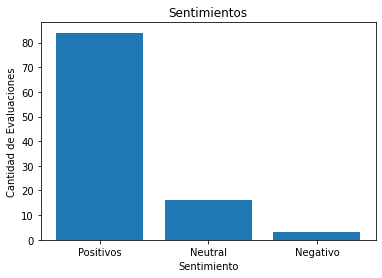

In [ ]:
import matplotlib.pyplot as plt
## Declaramos valores para el eje x
eje_x = sentimientos.keys()
 
## Declaramos valores para el eje y
eje_y = sentimientos.values()
 
## Creamos Gráfica
plt.bar(eje_x, eje_y)
 
## Legenda en el eje y
plt.ylabel('Cantidad de Evaluaciones')
 
## Legenda en el eje x
plt.xlabel('Sentimiento')
 
## Título de Gráfica
plt.title('Sentimientos')
 
## Mostramos Gráfica
plt.show()


In [ ]:
import pandas as pd
df = pd.DataFrame(evaluaciones)

In [ ]:

fecha = df['fecha']
puesto_df = df['puesto']
df.head(5)

,puesto,estado,ubicacion,fecha,comentario,bueno,mejorar
0,CONDUCTOR TANATOLOGO,Actual empleado,Boyacá,"6 de julio, 2021",Colocan vacantes y rechazan sin justificación ...,.,.
1,Asesor académico,Antiguo empleado,Bolívar,"27 de junio, 2021",Exelente empresa,Asesor y supervisors,Exelente horario
2,Asesor,Antiguo empleado,Antioquia,"20 de junio, 2021",muy buena empresa,Vacio,nada
3,Ejecutivo de ventas,Antiguo empleado,"Bogotá, D.C.","13 de mayo, 2021",Una excelente empresa con grandes beneficios ...,El poder Asender de puesto de acuerdo a las ha...,nada
4,Ejecutiva comercial,Actual empleado,"Bogotá, D.C.","12 de mayo, 2021",Una excelente empresa para generar ingresos y ...,Crecer financieramente,"ambiente laboral, trato al empleado"


In [ ]:

mejora = df['mejorar'].groupby(df['mejorar'].tolist()).size().reset_index().\
    rename(columns={0:'records'})
mejora.columns = ['mejorar', 'cantidad']


df_merge = pd.merge(mejora, df, on='mejorar')
df_merge.drop(['estado','ubicacion','comentario','bueno'], axis=1, inplace=True)
df_merge.head(70)


,mejorar,cantidad,puesto,fecha
0,.,1,CONDUCTOR TANATOLOGO,"6 de julio, 2021"
1,Ambiente laboral,1,Asesor,"7 de junio, 2019"
2,Atención alos trabajadores,1,Asesor/a comercial puerta a puerta,"17 de enero, 2019"
3,Bienestar del trabajador,1,Ejecutiva de ventas,"28 de marzo, 2019"
4,Calidad humana,1,Asesora ponal,"24 de abril, 2020"
...,...,...,...,...
65,nada,62,Asesora de cobranzas,"4 de septiembre, 2018"
66,nada,62,Asesor/a comercial puerta a puerta,"3 de agosto, 2018"
67,nada,62,Telemercaderista,"30 de julio, 2018"
68,nada,62,Ejecutivo compras,"7 de junio, 2018"


In [ ]:
df_merge.to_excel('mejora.xlsx', sheet_name='example')

In [ ]:
puesto = df['puesto'].groupby(df['puesto'].tolist()).size().reset_index().\
    rename(columns={0:'records'})
puesto

,index,puesto
0,Afiliadora,1
1,Agente de atención al cliente,1
2,Analista de cartera empresarial,1
3,Asesor,4
4,Asesor académico,1
...,...,...
58,asesor ministerio de defensa,1
59,coordinadora de servicios,1
60,coordinadora regional,1
61,si,1


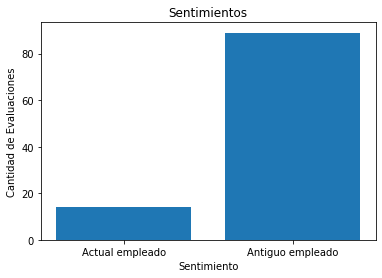

              index  estado
0   Actual empleado      14
1  Antiguo empleado      89


In [ ]:
estado = df['estado'].groupby(df['estado'].tolist()).size().reset_index().\
    rename(columns={0:'records'})
estado

eje_x = estado['index']
 
## Declaramos valores para el eje y
eje_y = estado['estado']
 
## Creamos Gráfica
plt.bar(eje_x, eje_y)
 
## Legenda en el eje y
plt.ylabel('Cantidad de Evaluaciones')
 
## Legenda en el eje x
plt.xlabel('Sentimiento')
 
## Título de Gráfica
plt.title('Sentimientos')
 
## Mostramos Gráfica
plt.show()

print(estado)

In [ ]:
ubicacion = df['ubicacion'].groupby(df['ubicacion'].tolist()).size().reset_index().\
    rename(columns={0:'records'})
ubicacion

,index,ubicacion
0,Antioquia,5
1,Atlántico,8
2,"Bogotá, D.C.",58
3,Bolívar,5
4,Boyacá,1
5,Caquetá,1
6,Casanare,1
7,Cauca,1
8,Cundinamarca,6
9,Córdoba,4


In [ ]:
df.to_excel('computrabajo.xlsx', sheet_name='example')